## **Import Required Libraries**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## **UNZIP Files**

In [4]:
import zipfile
import pandas as pd
import os

def unzip(zip_file_path, output_dir_path):
    with zipfile.ZipFile(zip_file_path, "r") as zip:
        zip.extractall(output_dir_path)
    print("Data uncompressed successfully...")
    print()

zip_file_path = r"C:\Users\VARSHINA\Downloads\txt_reviews.zip"
output_dir_path = r"D:\Extracted_text_files"

unzip(zip_file_path,output_dir_path)

FileNotFoundError: [Errno 2] No such file or directory: 'data\\txt_reviews.zip'

## **Writing Data to csv file**

In [ ]:
from tqdm import tqdm

def read_text_files(output_dir_path):
    """
    Reads all .txt files from the specified directory using os.walk and returns a DataFrame.
    Each row in the DataFrame contains the file name and its content details.
    """
    files_data = []

    # Gather all file paths first
    all_files = []
    for root, dirs, files in os.walk(output_dir_path):
        for file_name in files:
            if file_name.endswith(".txt"):
                all_files.append(os.path.join(root, file_name))
    
    # Use tqdm to show progress
    for file_path in tqdm(all_files, desc="Reading Text Files"):
        try:
            with open(file_path, "r", encoding="utf-8") as f:
                file_content = f.read().strip().split('\n') 
                file_data = {}
                for line in file_content:
                    key, value = line.split(': ', 1)
                    file_data[key] = value
                file_data['file_name'] = os.path.basename(file_path)
                files_data.append(file_data)
        except UnicodeDecodeError as e:
            print(f"Error reading {file_path}: {e}")

    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(files_data)
    return df

output_dir_path = r"D:\Extracted_text_files"
df = read_text_files(output_dir_path)

# Save the DataFrame to a CSV file
output_csv_path = 'output.csv'
df.to_csv(output_csv_path, index=False)

print(f"DataFrame saved to {output_csv_path}") 

In [ ]:
df

## **Step 1 - Load The Dataset**

In [9]:
df = pd.read_csv(r'data\output.csv') 
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,file_name
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,review_1.txt
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,review_10.txt
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,review_100.txt
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",review_1000.txt
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,review_10000.txt


## **Step 2 - Exploratory Data Analysis**

In [4]:
df.shape

(568454, 10)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568428 non-null  object
 3   HelpfulnessNumerator    568454 non-null  int64 
 4   HelpfulnessDenominator  568454 non-null  int64 
 5   Score                   568454 non-null  int64 
 6   Time                    568454 non-null  int64 
 7   ReviewSummary           568427 non-null  object
 8   ReviewText              568454 non-null  object
 9   file_name               568454 non-null  object
dtypes: int64(4), object(6)
memory usage: 43.4+ MB


* It looks there is no null values
* Here in dataframe 4 int, 6 object columns

#### **Creating `Helpfulness_percentage` as column by using `('HelpfulnessNumerator' / 'HelpfulnessDenominator')`**

In [11]:
df['Helpfulness_percentage'] = (df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']) * 100

In [7]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,file_name,Helpfulness_percentage
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,review_1.txt,100.0
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,review_10.txt,NaN
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,review_100.txt,0.0
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",review_1000.txt,40.0
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,review_10000.txt,0.0


## **2.a. Explore the Data Distribution of Target Variable**


In [7]:
df['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [8]:
df['Score'].value_counts(normalize = True)

Score
5    0.638789
4    0.141885
1    0.091948
3    0.075010
2    0.052368
Name: proportion, dtype: float64

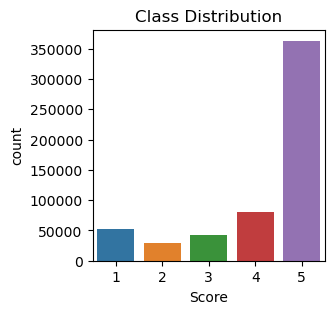

In [9]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Class Distribution")
sns.countplot(data=df, x='Score')

plt.show()

## **2.b. Visualizing the distribution of most frequent words**

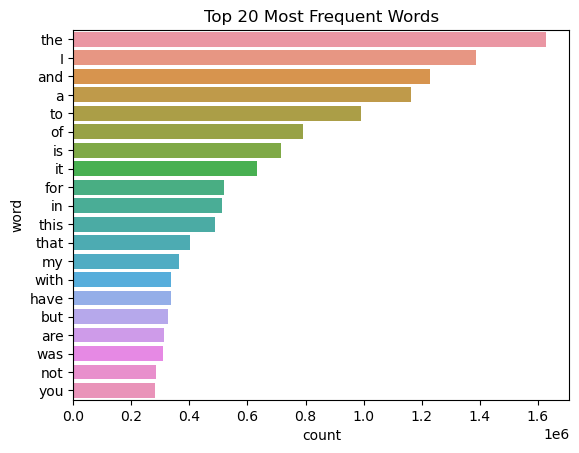

In [10]:
from collections import Counter

# Get all words in the text
all_words = " ".join(df['ReviewText'].values).split()
word_counts = Counter(all_words)

# Get the most common words
common_words = word_counts.most_common(20)

# Convert to DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot the most common words
sns.barplot(data=common_words_df, x='count', y='word')
plt.title('Top 20 Most Frequent Words')
plt.show() 

## **2.c. Classwise WordCloud - Explore the Relationships between each pair of Inputs and Output**

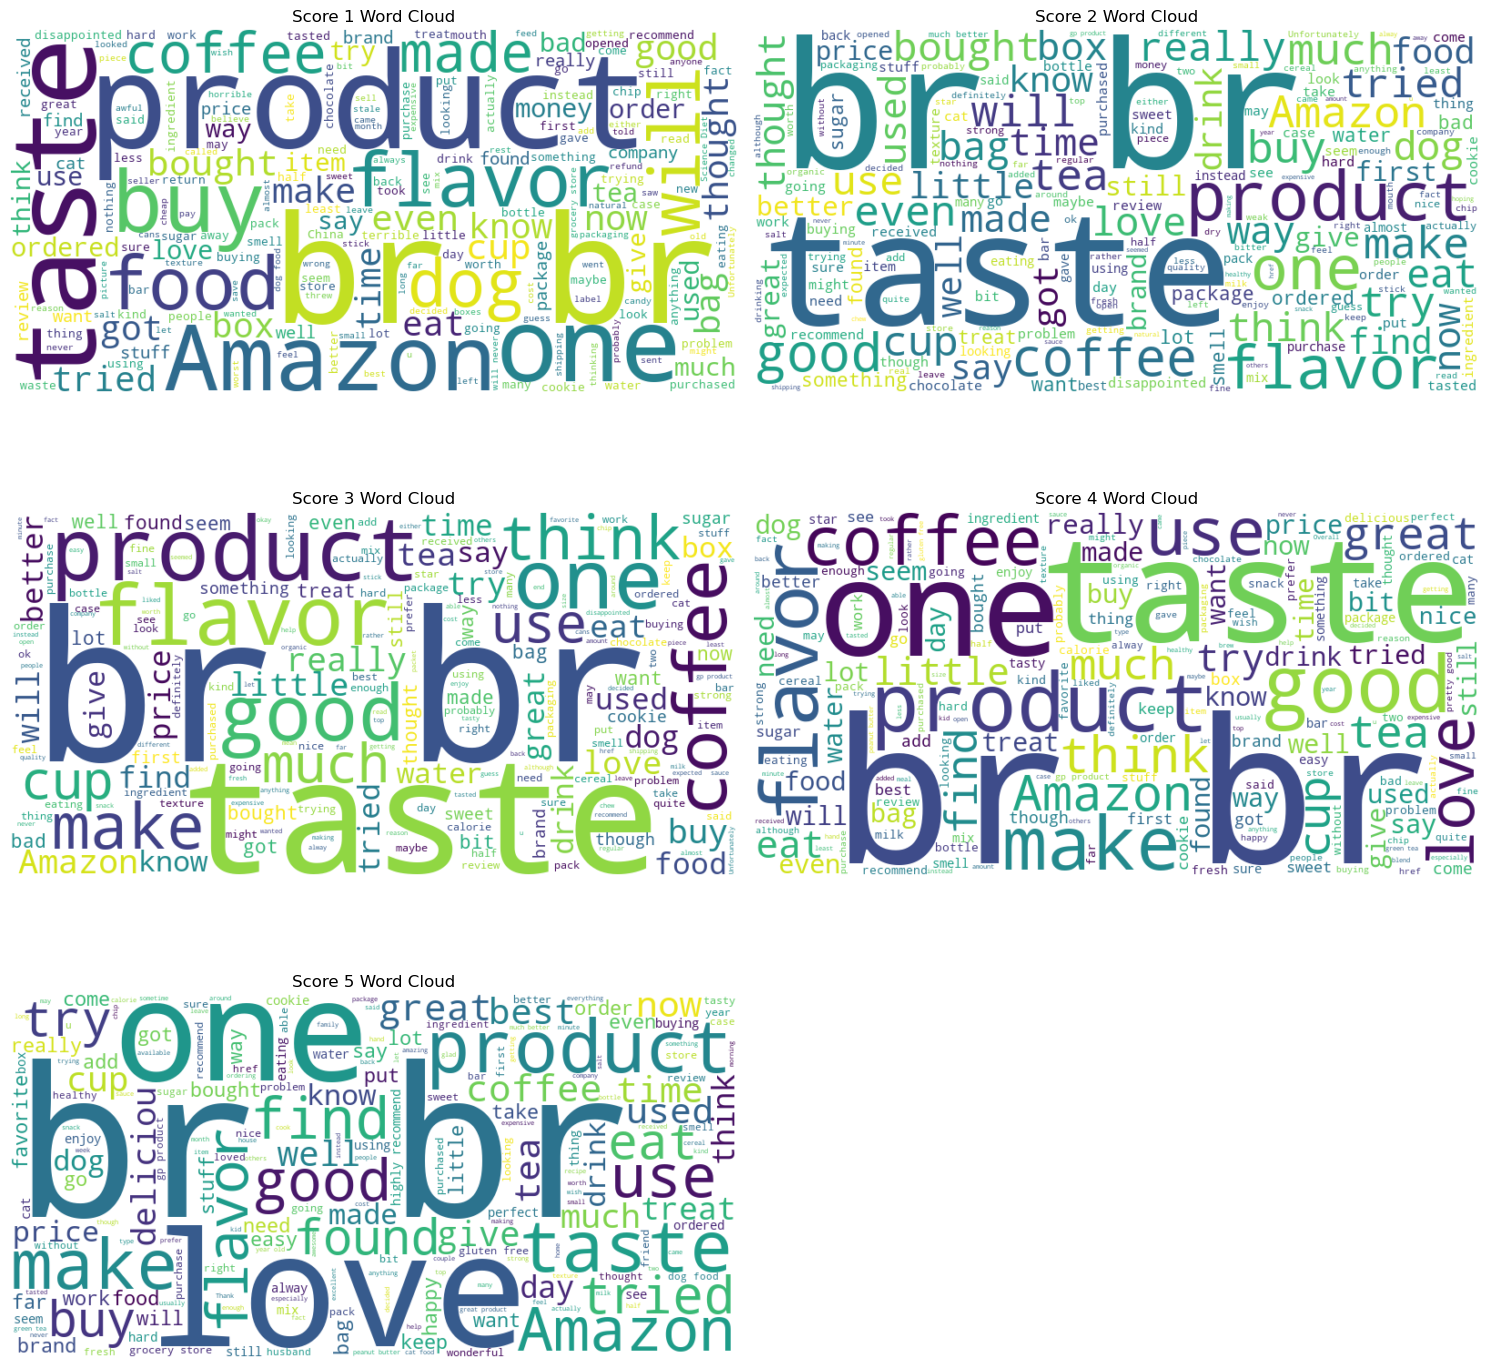

In [11]:
from wordcloud import WordCloud

# Generate word clouds for each score
score_wordclouds = {}
for score in range(1, 6):
    score_text = " ".join(df[df['Score'] == score]['ReviewText'].values)
    score_wordclouds[score] = WordCloud(width=800, height=400, background_color='white').generate(score_text)

# Display the word clouds
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

# Define titles for each score
score_titles = ['Score 1', 'Score 2', 'Score 3', 'Score 4', 'Score 5']

# Plot the word clouds
for i in range(5):
    row, col = divmod(i, 2)
    ax[row, col].imshow(score_wordclouds[i + 1], interpolation='bilinear')
    ax[row, col].axis('off')
    ax[row, col].set_title(f'{score_titles[i]} Word Cloud')

# Hide the last subplot (3, 1)
fig.delaxes(ax[2, 1])

plt.tight_layout()
plt.show()


#### **Note : Here we are selecting 50,000 samples from original dataset**

In [13]:
from sklearn.model_selection import train_test_split

strata_column = 'Score'

# Perform Stratified Sampling
df_sample, _ = train_test_split(df, test_size=(len(df) - 50000) / len(df), stratify=df[strata_column], random_state=42)

# Check the size of the sampled dataset
print("Sampled Dataset Size:", len(df_sample))

Sampled Dataset Size: 50000


## **Step 3 - Segregate Inputs (X) and Output (y)**

In [15]:
X = df_sample[['ReviewText']]
y = df_sample['Score']

## **Step 4 - Split the data into Train and Test**

In [17]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(35000, 1) (35000,)
(15000, 1) (15000,)


## **Step 5 - Apply Data Preparation on Training Data**

#### **Note : Before Applying Text Vectorization techniques must do `Text preprocessing` on the raw text data** 

In [25]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

def clean(doc):
    
    # Ensure doc is a string
    if isinstance(doc, str):
        # HTML Parsing and Cleanup
        soup = BeautifulSoup(doc, "html.parser")
        doc = soup.get_text()
    else:
        raise ValueError("Input should be a string containing HTML content.")

    # Removing Special characters
    regex = r'[^a-zA-Z\s]'
    doc = re.sub(regex, '', doc)

    # Lowercase text
    text = doc.lower()

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    custom_stop_words = {'br','one','product','will','flavor','love','taste'}
    stop_words = stop_words.union(custom_stop_words)
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join and return
    return " ".join(lemmatized_tokens)

In [19]:
def tokenizer(doc):
    # Tokenization
    return nltk.word_tokenize(doc) 

## **BOW Text Vectorization: Apply CountVectorizer**

In [27]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectoriezer
bow_vect = CountVectorizer(token_pattern=None,
                           tokenizer=tokenizer,
                           ngram_range=(1, 1), 
                           lowercase=False, 
                           preprocessor=clean, 
                           stop_words=None)

# use it to extract features from training data
%time X_train_transformed = bow_vect.fit_transform(X_train['ReviewText'])

print()
print(f"Shape of X_train_transformed (# of docs, # of unique vocabulary): {X_train_transformed.shape}")
print(f"Type of X_train_transformed (i.e. Compressed Sparse Row (CSR) format): {type(X_train_transformed)}")
print(f"Vocabulary learned: {bow_vect.get_feature_names_out()[:10]}")

C:\Users\VARSHINA\AppData\Local\Temp\ipykernel_22684\4221215392.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(doc, "html.parser")


CPU times: total: 32.7 s
Wall time: 39 s

Shape of X_train_transformed (# of docs, # of unique vocabulary): (35000, 54972)
Type of X_train_transformed (i.e. Compressed Sparse Row (CSR) format): <class 'scipy.sparse._csr.csr_matrix'>
Vocabulary learned: ['aa' 'aaa' 'aaaa' 'aaaaaaaaaa' 'aaaaaaaaaaa' 'aaaaaaarrrrrggghhh'
 'aaaaaah' 'aaaallll' 'aaaand' 'aaaannnndddgolazo']


#### **Question: How can I visualize the impact of the above text cleaning process?**

In [28]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()
df_sample['clean_ReviewText'] = df_sample['ReviewText'].progress_apply(lambda x : clean(x))
df_sample[['ReviewText','clean_ReviewText']]

  0%|          | 0/50000 [00:00<?, ?it/s]C:\Users\VARSHINA\AppData\Local\Temp\ipykernel_22684\4221215392.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(doc, "html.parser")
100%|██████████| 50000/50000 [00:48<00:00, 1035.56it/s]


,ReviewText,clean_ReviewText
379988,This is a nice wake up get you going in the mo...,nice wake get going morning cup coffee keurig ...
354407,"I didn't read reviews, just purchased in store...",didnt read review purchased store puppy would ...
481392,Saw these online thought something different. ...,saw online thought something different healthy...
96161,Pamela's GF flour products are THE ONLY Gluten...,pamelas gf flour product gluten free flour use...
103749,Closest to sugar in taste and consistency. I'm...,closest sugar consistency im former splenda fa...
...,...,...
58394,I love the taste of the nuts. I like them out ...,nut like box well mixed cooking anythingthe si...
256546,Uncle Lee's Tea can be difficult to find where...,uncle lee tea difficult find live keep tea wor...
81403,My dogs are crazy. I've tried for years to ge...,dog crazy ive tried year get eat high quality ...
280726,"This is quite a tasty, delightful and healthy ...",quite tasty delightful healthy meal healthcons...


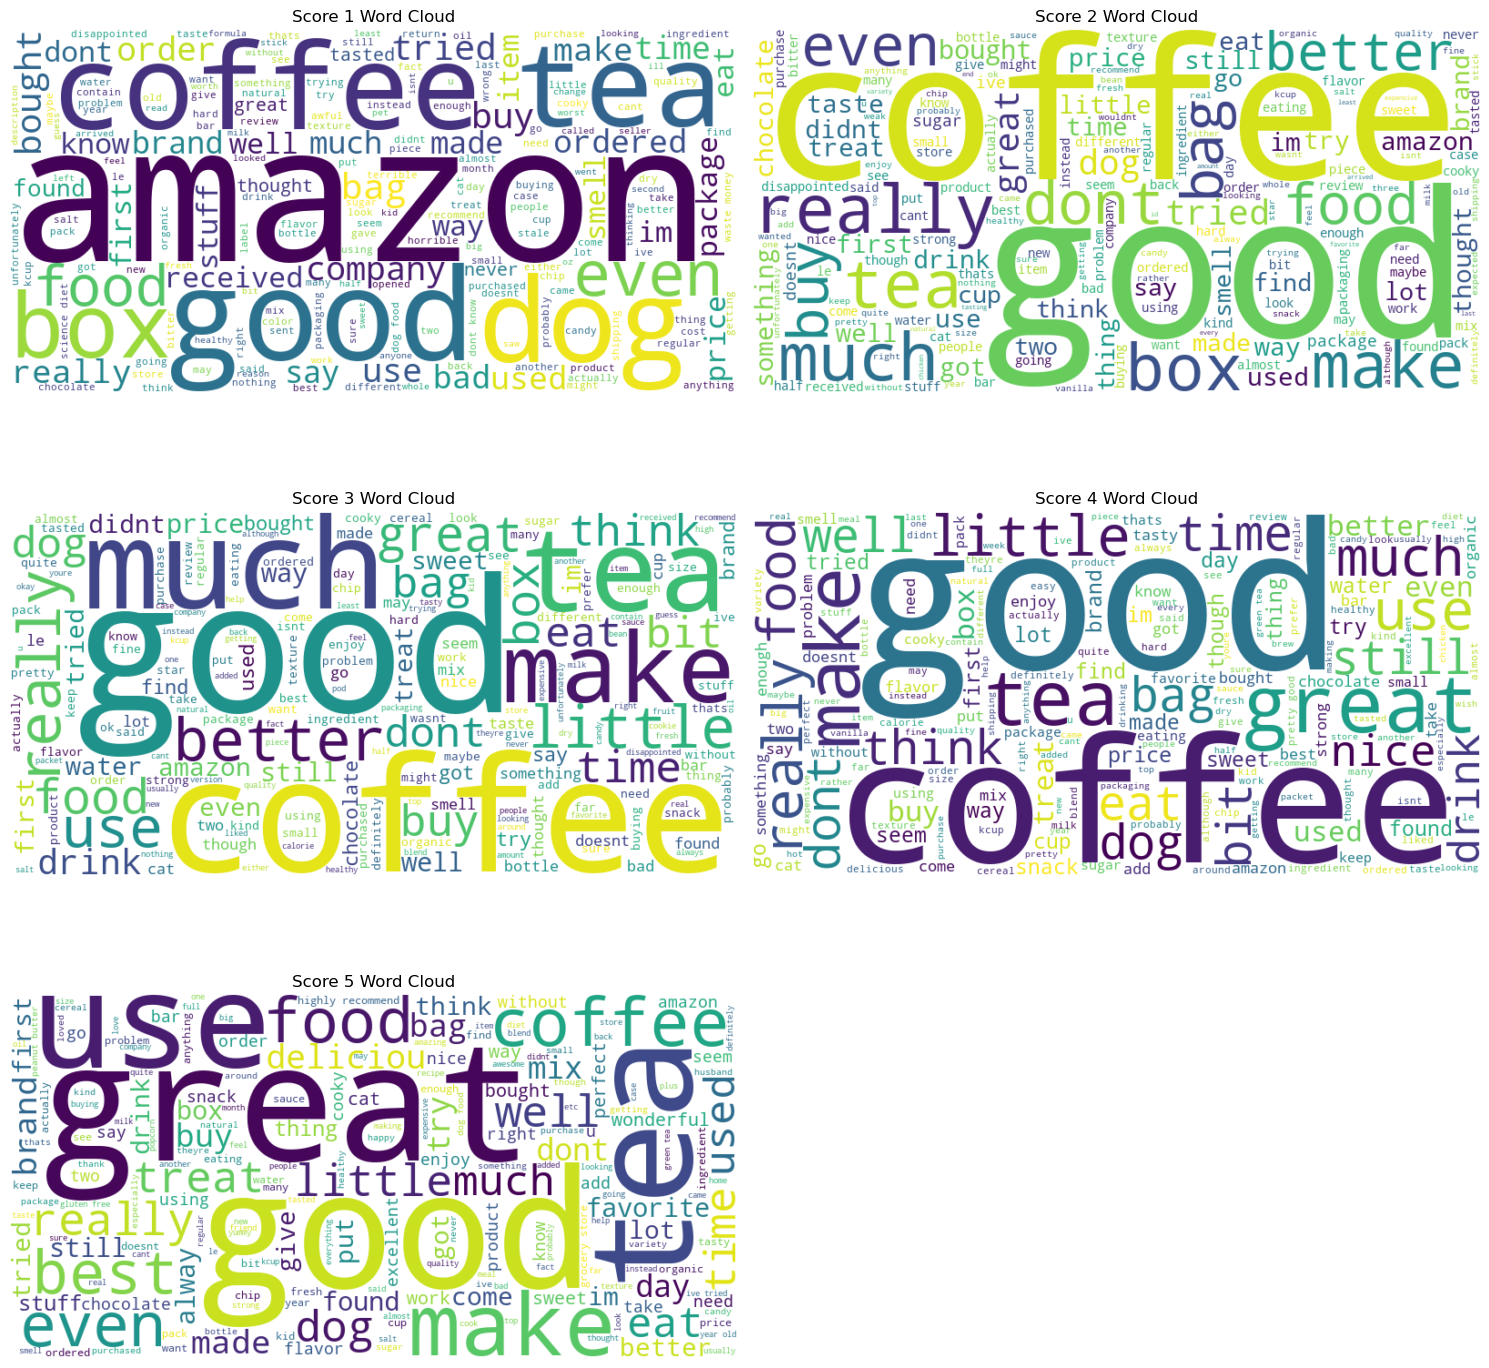

In [83]:
from wordcloud import WordCloud

# Generate word clouds for each score
score_wordclouds = {}
for score in range(1, 6):
    score_text = " ".join(df_sample[df_sample['Score'] == score]['clean_ReviewText'].values)
    score_wordclouds[score] = WordCloud(width=800, height=400, background_color='white').generate(score_text)

# Display the word clouds
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

# Define titles for each score
score_titles = ['Score 1', 'Score 2', 'Score 3', 'Score 4', 'Score 5']

# Plot the word clouds
for i in range(5):
    row, col = divmod(i, 2)
    ax[row, col].imshow(score_wordclouds[i + 1], interpolation='bilinear')
    ax[row, col].axis('off')
    ax[row, col].set_title(f'{score_titles[i]} Word Cloud')

# Hide the last subplot (3, 1)
fig.delaxes(ax[2, 1])

plt.tight_layout()
plt.show()

## **Step 7 - Apply Data Prepartion on Test Data**

In [30]:
X_test_transformed = bow_vect.transform(X_test['ReviewText'])
print(f'Shape of X_test_transformed: {X_test_transformed.shape}') 

C:\Users\VARSHINA\AppData\Local\Temp\ipykernel_22684\4221215392.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(doc, "html.parser")


Shape of X_test_transformed: (15000, 54972)


## **Step 6,8,9 - Training and Testing Phase**

###  **a. Naive Bayes**

In [15]:
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Building the Model
classifier = MultinomialNB() 
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for Naive Bayes
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

NB_prediction_time = time.time() - start_time

# Model Evaluation
print()
print(f"Model's Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Naive Bayes Model Prediction Time: {NB_prediction_time:.2f} seconds")

CPU times: total: 31.2 ms
Wall time: 25.4 ms

Model's Accuracy: 0.6776
Naive Bayes Model Prediction Time: 0.01 seconds


### **b. Logistic Regression**

In [34]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Building the Model
classifier = LogisticRegression()
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for Logistic Regression
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

LR_prediction_time = time.time() - start_time

# Model Evaluation
print()
print(f"Model's Accuracy :{metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Logistic Regression Model prediction Time: {LR_prediction_time:.2f} seconds")

CPU times: total: 11.4 s
Wall time: 5.46 s

Model's Accuracy :0.6968
Logistic Regression Model prediction Time: 0.01 seconds


C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **c. Decision Tree**

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Building the Model
classifier = DecisionTreeClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for Decision Tree
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

DT_prediction_time = time.time() - start_time

# Model's Evaluation
print()
print(f"Model's Accuracy : {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Decision Tree Model Prediction Time: {DT_prediction_time:.2f} seconds")

CPU times: total: 45.8 s
Wall time: 1min 32s

Model's Accuracy : 0.6210666666666667
Decision Tree Model Prediction Time: 0.02 seconds


### **d. K Nearest Neighbor**

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Building the Model
classifier = KNeighborsClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for K Nearest Neighbor
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

KNN_prediction_time = time.time() - start_time

# Model's Evaluation
print()
print(f"Model's Accuracy : {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"K Nearest Neighbor Model Prediction Time: {KNN_prediction_time:.2f} seconds")

CPU times: total: 0 ns
Wall time: 8.21 ms

Model's Accuracy : 0.6132
K Nearest Neighbor Model Prediction Time: 39.05 seconds


### **e. Random Forest**

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Building the Model
classifier = RandomForestClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for Random Forest 
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

RF_prediction_time = time.time() - start_time

# Model's Evaluation
print()
print(f"Model's Accuracy : {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Random Forest Model Prediction Time: {RF_prediction_time:.2f} seconds")

CPU times: total: 6min 8s
Wall time: 12min 17s

Model's Accuracy : 0.6878
Random Forest Model Prediction Time: 2.26 seconds


## **TF IDF Text Vectorization: Apply TfidfVectorizer** (Note: We won't use `TF IDF Text Vectorization`)

In [91]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(token_pattern=None,
                             tokenizer = tokenizer,
                             ngram_range=(1, 1), 
                             lowercase=False, 
                             preprocessor=clean, 
                             stop_words=None)

out = tfidf_vect.fit_transform(X_train['ReviewText'])

print(f"Shape of output (# of docs, # of unique vocabulary): {out.shape}")

print(f"Type of output (i.e. Compressed Sparse Row (CSR) format): {type(out)}")

C:\Users\VARSHINA\AppData\Local\Temp\ipykernel_15164\660009087.py:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(doc, "html.parser")


Shape of output (# of docs, # of unique vocabulary): (35000, 54972)
Type of output (i.e. Compressed Sparse Row (CSR) format): <class 'scipy.sparse._csr.csr_matrix'>


### **a. Naive Bayes**

In [92]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Building the Model
classifier = MultinomialNB() 
%time classifier.fit(out, y_train)

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

# Model Evaluation
print()
print(f"Model's Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}")

CPU times: total: 15.6 ms
Wall time: 49.7 ms

Model's Accuracy: 0.6371333333333333


### **b. Logistic Regression**

In [93]:
from sklearn.linear_model import LogisticRegression

# Building the Model
classifier = LogisticRegression()
%time classifier.fit(out, y_train)

# Predicting on unssen data
y_test_pred = classifier.predict(X_test_transformed)

# Model Evaluation
print()
print(f"Model's Accuracy :{metrics.accuracy_score(y_test, y_test_pred)}")

CPU times: total: 21.9 s
Wall time: 14.4 s

Model's Accuracy :0.6166666666666667


C:\Users\VARSHINA\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Visualizing Prediction Times for Different Classification Models**

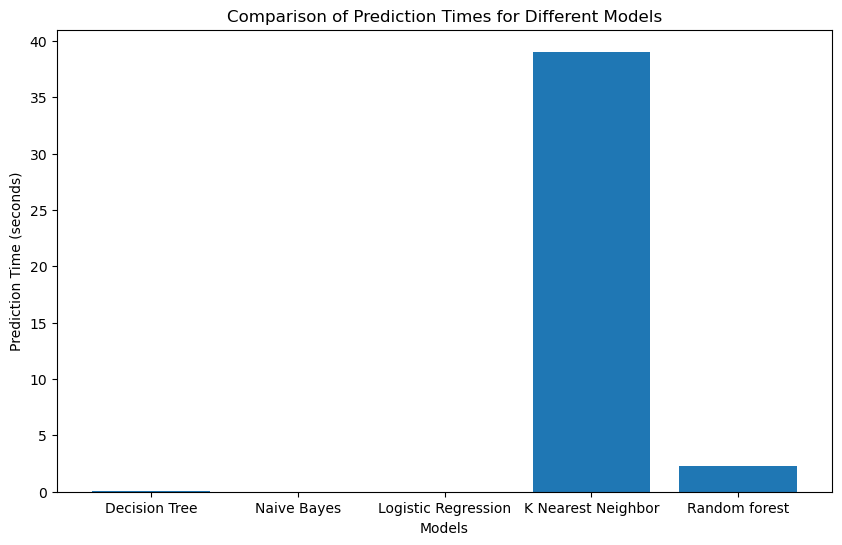

In [27]:
# Model names
model_names = ['Decision Tree', 'Naive Bayes', 'Logistic Regression', 'K Nearest Neighbor', 'Random forest']

# Prediction times
prediction_times = [DT_prediction_time, NB_prediction_time, LR_prediction_time, KNN_prediction_time, RF_prediction_time]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, prediction_times)
plt.xlabel('Models')
plt.ylabel('Prediction Time (seconds)')
plt.title('Comparison of Prediction Times for Different Models')
plt.show()

## Saving the Model and Vectorizer in Pickle


In [38]:
from pickle import dump

dump(bow_vect, open('pickle/countvectorizer.pkl', 'wb'))

dump(classifier, open('pickle/logit_model.pkl', 'wb'))